## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_as_received = pd.merge(mouse_metadata,study_results, on='Mouse ID')

In [2]:
# Checking the number of mice in the DataFrame.
num_mice =len(study_as_received['Mouse ID'].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = study_as_received.duplicated(subset=['Mouse ID','Timepoint'], keep=False)

In [4]:
# Get all the data for any duplicate mouse ID. 
duplicate_mice_data = study_as_received.loc[duplicate_mice,:]

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
clean_study = study_as_received.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='last')

In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_study['Mouse ID'].unique())
num_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and 
# putting them all together at the end.
drug_regimen = clean_study.groupby(['Drug Regimen'])

mean_volume = drug_regimen['Tumor Volume (mm3)'].mean()
mean_volume = mean_volume.rename('Mean Tumor Volume (mm3)')

median_volume = drug_regimen['Tumor Volume (mm3)'].median()
median_volume = median_volume.rename('Median Tumor Volume (mm3)')
                 
var_volume = drug_regimen['Tumor Volume (mm3)'].var()
var_volume = var_volume.rename('Tumor Volume Variance (mm3)')
                 
std_volume = drug_regimen['Tumor Volume (mm3)'].std()
std_volume = std_volume.rename('Tumor Volume Standard Deviation (mm3)')
                 
sem_volume = drug_regimen['Tumor Volume (mm3)'].sem()
sem_volume = sem_volume.rename('Tumor Volume Standard Errors (mm3)')
                 
# combine all statistical parameters into one data frame
summary_stats_concat = pd.concat([mean_volume,median_volume,
                             var_volume,std_volume,sem_volume],axis=1)
summary_stats_concat

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation (mm3),Tumor Volume Standard Errors (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summary_stats = clean_study[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

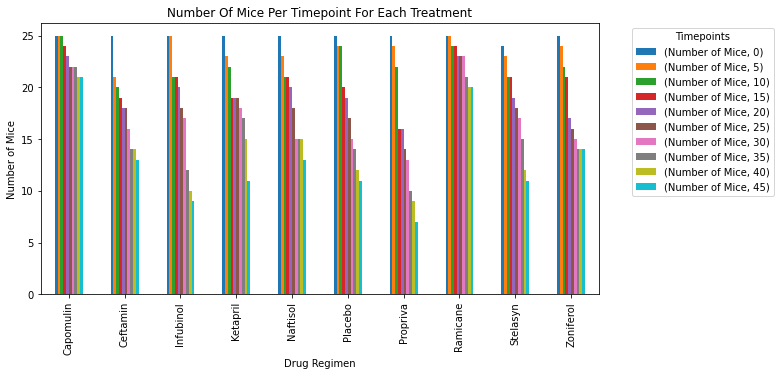

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pandas.
mice_per_timepoint = clean_study[['Drug Regimen','Timepoint','Mouse ID']].groupby(
                                            ['Drug Regimen','Timepoint']).count()
mice_per_timepoint = mice_per_timepoint.rename(columns={"Mouse ID":'Number of Mice'})
mice_per_timepoint_unstack = mice_per_timepoint.unstack(level=1)
df_bar_chart = mice_per_timepoint_unstack.plot(kind='bar', figsize=(10,5),
                                        title='Number Of Mice Per Timepoint For Each Treatment')
df_bar_chart.set_ylabel('Number of Mice')
df_bar_chart.legend(bbox_to_anchor=(1.05,1),title='Timepoints')
df_bar_chart
# x_axis = [value for value in range(0,len(mice_per_timepoint))]
# tick_location = x_axis
# labels = mice_per_timepoint.iloc[:,0:0]

# plt.bar(x_axis, mice_per_timepoint['Mouse ID'],color='gray',alpha=0.5,align='center')
# plt.xticks(tick_location,labels)
# plt.tight_layout()
# plt.show()
# mice_per_timepoint.plot(kind='bar',figsize=(20,3))
# plt.show()

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
